Precisa:

- importar
- truncar por experimento
- adicionar label de intercepto

- encontrar raio do garrafao
- encontrar espessura do eva

In [1]:
import numpy as np
import pandas as pd

In [2]:
raw_data = pd.read_csv('raw_data/recording_3/recording_3',  sep=", | -> ", names = ["timestamp", "intern_clock", 7, 6, 8, 5, 3, 1, 2, 4], engine = "python")
cols = ["timestamp", "intern_clock", 1, 2, 3, 4, 5, 6, 7, 8]
raw_data = raw_data[cols]
raw_data.drop('timestamp', inplace=True, axis=1)
raw_data = raw_data.astype({1:"int", 2:"int", 3:"int", 4:"int", 5:"int", 6:"int", 7:"int", 8:"int"})
raw_data

,intern_clock,1,2,3,4,5,6,7,8
0,19895,257,351,9,9,6394779,2444399,-3248121,19892
1,19964,258,352,9,9,6395570,2444312,-3251108,19785
2,20056,258,352,9,9,6396641,2444283,-3255520,19582
3,20154,258,352,9,9,6400501,2444255,-3259004,19430
4,20252,258,351,9,9,6402156,2444262,-3260653,19491
...,...,...,...,...,...,...,...,...,...
445,368577,10,11,11,10,1990563,2428193,-3073435,-9080
446,368675,10,10,11,10,1991085,2428067,-3073444,-9055
447,368774,11,10,11,10,1991509,2428026,-3073423,-9072
448,368872,10,10,11,11,1991812,2428028,-3073457,-9219


In [3]:
x1 = raw_data.truncate(before=0, after=49)
x2 = raw_data.truncate(before=50, after=99)
x3 = raw_data.truncate(before=100, after=149)
x4 = raw_data.truncate(before=150, after=199)
x5 = raw_data.truncate(before=200, after=249)

tara = raw_data.truncate(before=250, after=449)


In [4]:
tara = tara.sum()/tara.shape[0]
tara["intern_clock"] = 0
tara[:][1] = 0
tara[:][2] = 0
tara[:][3] = 0
tara[:][4] = 0

In [5]:
# corrige tara

x1 = x1.apply(lambda x: x - tara, axis=1)
x2 = x2.apply(lambda x: x - tara, axis=1)
x3 = x3.apply(lambda x: x - tara, axis=1)
x4 = x4.apply(lambda x: x - tara, axis=1)
x5 = x5.apply(lambda x: x - tara, axis=1)

Aqui entra um pouco de geometria, mas pelo desenho experimental, com $\beta_1$ consegue-se $\beta_0$:

In [6]:
# adiciona variaveis a serem previstas (recolhidas no experimento)
import math

d = 65.5/(2*math.pi)
d_linha = d/(math.cos(math.atan(7/116)))

x1["beta_0_apriori"] = [7.5 + d_linha]*50
x2["beta_0_apriori"] = [4 + d_linha]*50
x3["beta_0_apriori"] = [21.5 + d_linha]*50
x4["beta_0_apriori"] = [28 + d_linha]*50
x5["beta_0_apriori"] = [13.5 + d_linha]*50

x1["beta_1_apriori"] = [-7/116]*50
x2["beta_1_apriori"] = [-7/116]*50
x3["beta_1_apriori"] = [-7/116]*50
x4[""] = [-7/116]*50
x5["beta_1_apriori"] = [-7/116]*50

In [7]:
data = pd.concat([x1, x2, x3, x4, x5])

In [8]:
data

,intern_clock,1,2,3,4,5,6,7,8,beta_0_apriori,beta_1_apriori,
0,19895.0,257.0,351.0,9.0,9.0,4496788.8,17702.825,-175008.875,31264.095,17.943612,-0.060345,NaN
1,19964.0,258.0,352.0,9.0,9.0,4497579.8,17615.825,-177995.875,31157.095,17.943612,-0.060345,NaN
2,20056.0,258.0,352.0,9.0,9.0,4498650.8,17586.825,-182407.875,30954.095,17.943612,-0.060345,NaN
3,20154.0,258.0,352.0,9.0,9.0,4502510.8,17558.825,-185891.875,30802.095,17.943612,-0.060345,NaN
4,20252.0,258.0,351.0,9.0,9.0,4504165.8,17565.825,-187540.875,30863.095,17.943612,-0.060345,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
245,294171.0,263.0,363.0,22.0,22.0,4491580.8,13391.825,-236975.875,37860.095,23.943612,-0.060345,NaN
246,294269.0,263.0,363.0,22.0,22.0,4492025.8,13407.825,-236975.875,37709.095,23.943612,-0.060345,NaN
247,294367.0,263.0,363.0,22.0,22.0,4492821.8,13354.825,-236986.875,37662.095,23.943612,-0.060345,NaN
248,294465.0,263.0,363.0,22.0,21.0,4492206.8,13323.825,-236989.875,37780.095,23.943612,-0.060345,NaN


In [9]:
# deletando colunas que nao são úteis

data.drop(3, inplace=True, axis=1)
data.drop(4, inplace=True, axis=1)

In [10]:
data

,intern_clock,1,2,5,6,7,8,beta_0_apriori,beta_1_apriori,
0,19895.0,257.0,351.0,4496788.8,17702.825,-175008.875,31264.095,17.943612,-0.060345,NaN
1,19964.0,258.0,352.0,4497579.8,17615.825,-177995.875,31157.095,17.943612,-0.060345,NaN
2,20056.0,258.0,352.0,4498650.8,17586.825,-182407.875,30954.095,17.943612,-0.060345,NaN
3,20154.0,258.0,352.0,4502510.8,17558.825,-185891.875,30802.095,17.943612,-0.060345,NaN
4,20252.0,258.0,351.0,4504165.8,17565.825,-187540.875,30863.095,17.943612,-0.060345,NaN
...,...,...,...,...,...,...,...,...,...,...
245,294171.0,263.0,363.0,4491580.8,13391.825,-236975.875,37860.095,23.943612,-0.060345,NaN
246,294269.0,263.0,363.0,4492025.8,13407.825,-236975.875,37709.095,23.943612,-0.060345,NaN
247,294367.0,263.0,363.0,4492821.8,13354.825,-236986.875,37662.095,23.943612,-0.060345,NaN
248,294465.0,263.0,363.0,4492206.8,13323.825,-236989.875,37780.095,23.943612,-0.060345,NaN


Agora falta transformar os dados dos vetores 5 e 6 (envolvidos no experimento) em medida de quão distânte estava o corpo de prova. Informação para como isso é feito se encontra em [não sei onde vou colocar isso]

Isso envolve:

- determinar bijeção que relaciona dado do sensor e distância do corpo de prova
- resolver sistema usando gradiente descendente ou método equivalente
- transformar dados usando a função de correção com relação à inclinação da reta

pra resolver o sistema pode usar scipy: <https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html>

In [19]:
from scipy.optimize import minimize
import numpy as np
import random



def f(beta):
    
    err = 0
    
    for i in range(data.shape[0]):
        # por enquanto considerando que o valor dos sensores corresponde à distância
        s1 = data[1][i]
        s2 = data[2][i]
        
        err += ((s1 + 90)/(math.cos(math.pi/2 - math.atan(beta[1]))) - (beta[0] - beta[1]*120))**2
        err += ((s2 + 90)/(math.cos(math.pi/2 - math.atan(beta[1]))) - (beta[0] + beta[1]*120))**2
    
    return err

res = minimize(f, (random.randint(0, 100)/10, random.randint(0, 100)/10))
res.x

array([510.63471136,   0.99244918])

Agora vamos ver a função de corrigir os dados:

O $\beta_1$ usado foi de $0,0603$ e os pontos do eixo y onde a parte inferior do corpo de prova tocava eram de posição $7,5$, $4$, $21,5$, $28$ e $13,5$, de $x_1$ a $x_5$

Fazendo algumas contas, conseguimos chegar que o coeficiente $\beta_0$ se encontra por $\beta_{0,i} = \dfrac{R + e}{\cos(\arctan(\beta_1))} + x_i$

Plotando os $\beta_0$ calculados contra o valor dos sensores:

In [12]:
data["d1"] = [0]*data.shape[0]
data["d2"] = [0]*data.shape[0]

for i in range(data.shape[0]):
    a = data["beta_1_apriori"][i]
    b = 1
    c = data["beta_0_apriori"][i]
    
    
    
    data.loc[i, "d1"] = abs( (90*a - b*120 + c)/((a**2 + b**2)**(0.5)) )
    data.loc[i, "d2"] = abs( (90*a + b*120 + c)/((a**2 + b**2)**(0.5)) ) 


In [13]:
data

,intern_clock,1,2,5,6,7,8,beta_0_apriori,beta_1_apriori,,d1,d2
0,19895.0,257.0,351.0,4496788.8,17702.825,-175008.875,31264.095,17.943612,-0.060345,NaN,107.292248,132.271963
1,19964.0,258.0,352.0,4497579.8,17615.825,-177995.875,31157.095,17.943612,-0.060345,NaN,107.292248,132.271963
2,20056.0,258.0,352.0,4498650.8,17586.825,-182407.875,30954.095,17.943612,-0.060345,NaN,107.292248,132.271963
3,20154.0,258.0,352.0,4502510.8,17558.825,-185891.875,30802.095,17.943612,-0.060345,NaN,107.292248,132.271963
4,20252.0,258.0,351.0,4504165.8,17565.825,-187540.875,30863.095,17.943612,-0.060345,NaN,107.292248,132.271963
...,...,...,...,...,...,...,...,...,...,...,...,...
245,294171.0,263.0,363.0,4491580.8,13391.825,-236975.875,37860.095,23.943612,-0.060345,NaN,101.303142,138.261068
246,294269.0,263.0,363.0,4492025.8,13407.825,-236975.875,37709.095,23.943612,-0.060345,NaN,101.303142,138.261068
247,294367.0,263.0,363.0,4492821.8,13354.825,-236986.875,37662.095,23.943612,-0.060345,NaN,101.303142,138.261068
248,294465.0,263.0,363.0,4492206.8,13323.825,-236989.875,37780.095,23.943612,-0.060345,NaN,101.303142,138.261068


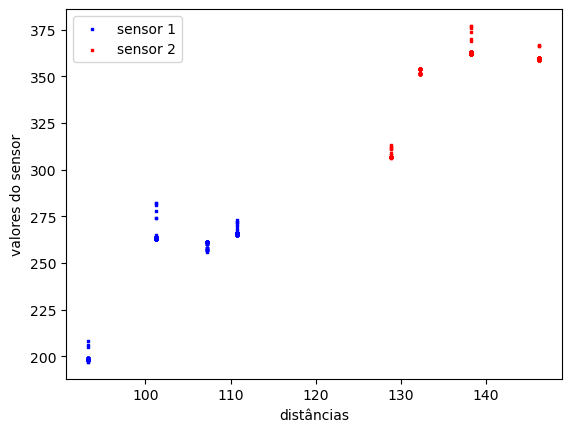

In [14]:
from matplotlib import pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(data["d1"], data[1], s=1, c='b', marker="s", label='sensor 1')
ax1.scatter(data["d2"], data[2], s=1, c='r', marker="s", label='sensor 2')

plt.legend(loc='upper left')

# x = np.linspace(-10, 30, 100)
# plt.plot(x, x**2*model[2] + x*model[1] + model[0])


plt.xlabel("distâncias")
plt.ylabel("valores do sensor")

plt.show()

fazer uma regressão pra cada distância e usar as parábolas pra gerar as distâncias correspondentes aos dados de cada sensor individualmente.

In [67]:
from scipy.optimize import minimize
import numpy as np
import random



def g(coefs):
    
    err = 0
    
    for i in range(data.shape[0]):
        
        s1 = data[1][i]
        d1 = data["d1"][i]
        
        err += (d1 - (s1*coefs[0]**2 + coefs[1]*s1 + coefs[2]))**2
        # err += (s1 - (d1*coefs[0]**2 + coefs[1]*d1 + coefs[2]))**2
        
    return err


'''
def h(coefs):
    
    err = 0
    
    for i in range(data.shape[0]):
        # por enquanto considerando que o valor dos sensores corresponde à distância
        s1 = data[1][i]
        s2 = data[2][i]
        
        err += data["d1"][i] - (coefs[0]**2*data[1][i] + coefs[1]*data[1][i] + coefs[2]
        
    return err
'''

# res_g = minimize(fun = g, x0 = (random.randint(0, 100)/10, random.randint(0, 100)/10, random.randint(0, 100)/10), tol = 0.0001)

res_g = minimize(fun = g, x0 = (1, 1, 1))

res_g.message


# toda vez ta resulado em coisa diferente


'NaN result encountered.'

ACHOU NaN!!!

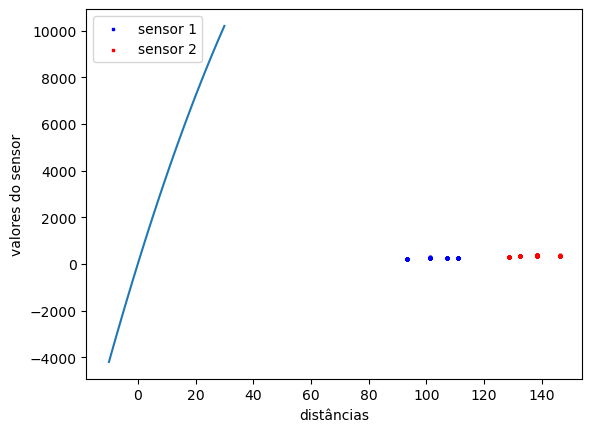

In [56]:
from matplotlib import pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(data["d1"], data[1], s=1, c='b', marker="s", label='sensor 1')
ax1.scatter(data["d2"], data[2], s=1, c='r', marker="s", label='sensor 2')

plt.legend(loc='upper left')

x = np.linspace(-10, 30, 100)
plt.plot(x, x**2*res_g.x[0] + x*res_g.x[1] + res_g.x[2])


plt.xlabel("distâncias")
plt.ylabel("valores do sensor")

plt.show()